In [19]:
import gradio as gr
from agentic.nodes import WorkflowState
from agentic.graph import VehicleChat, workflow_app

from IPython.display import Image, display
# from app import workflow_app
import sqlite3
import pandas as pd
import json

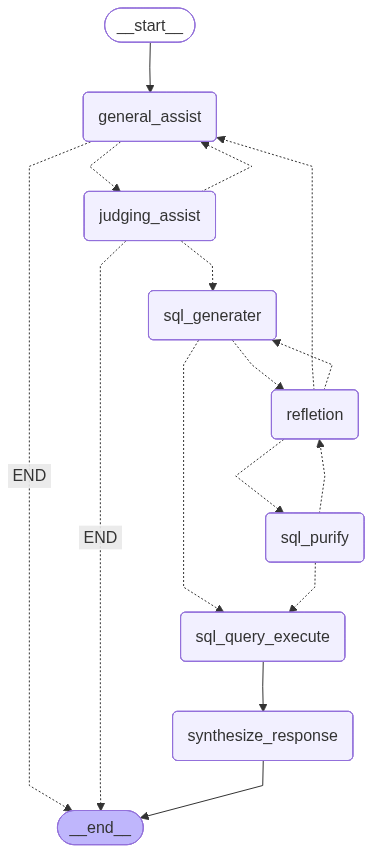

In [20]:
graph = await workflow_app()
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
import sqlite3
import pandas as pd

q = "SELECT * FROM vehicles WHERE year = '2022' and brand = 'Toyota'"
q = "SELECT * FROM vehicles WHERE year = '2020' and brand = 'Ford'"
q = "SELECT * FROM vehicles WHERE fuel_type = 'gasoline'"
# q = "SELECT * FROM vehicles WHERE LOWER(brand) = 'toyota' AND LOWER(model) = 'tacoma' AND year = 2022 AND LOWER(fuel_type) = 'gasoline' AND price BETWEEN 50000 AND 60000; "
# q = "SELECT * FROM vehicles WHERE LOWER(brand) = 'honda' AND LOWER(model) = 'cr-v' AND year = 2020 AND LOWER(fuel_type) = 'gasoline' AND price BETWEEN 15000 AND 30000;"
# q = "SELECT * FROM vehicles WHERE LOWER(brand) = 'kia' AND LOWER(model) = 'sportage' AND year = 2015 AND LOWER(fuel_type) = 'gasoline' AND price BETWEEN 12000 AND 50000 AND price IS NOT NULL "
# q = "SELECT * FROM vehicles WHERE id in (763, 742, 501 ) "
# q = "SELECT * FROM vehicles WHERE LOWER(brand) = 'subaru' AND LOWER(model) = 'forester' AND year = 2025 AND LOWER(engine_type) = 'gasoline' AND LOWER(fuel_type) = 'gasoline' AND price BETWEEN 15000 AND 50000"

# q = "SELECT * FROM vehicles WHERE LOWER(brand) = 'jeep' AND LOWER(model) = 'grand cherokee' AND year = 2016 AND LOWER(engine_type) = 'gasoline' AND price BETWEEN 17000 AND 50000"
# q = "SELECT * FROM vehicles WHERE LOWER(brand) LIKE 'nissan' AND LOWER(model) LIKE 'altaima' AND year = 2016 AND LOWER(fuel_type) LIKE 'gasoline'"

q = "SELECT * FROM vehicles WHERE brand = 'Toyota'"
q = "SELECT * FROM vehicles WHERE LOWER(brand) = 'toyota' AND LOWER(model) = 'camry' AND year = 2016 AND LOWER(color) = 'brown'"
# q="SELECT * FROM vehicles WHERE LOWER(brand) = 'mazda' AND LOWER(model) = 'cx-5' AND year = 2019 AND LOWER(fuel_type) = 'gasoline' AND LOWER(color) = 'blue'"
conn = sqlite3.connect("mcp_server/cars.db")
rs = pd.read_sql_query(q, conn)
print(rs)


      id   brand  model  year engine_type fuel_type  color  mileage  \
0  20654  Toyota  Camry  2016    inline_4    diesel  Brown  35946.2   

   number_of_doors transmission     price  
0                2       manual  21532.06  


In [ ]:
q = "SELECT * FROM vehicles WHERE LOWER(brand) LIKE 'nissan' AND LOWER(model) LIKE 'altaima' AND year = 2016 AND LOWER(fuel_type) LIKE 'gasoline'"
q = "SELECT * FROM vehicles WHERE LOWER(brand) = LOWER('toyota') AND LOWER(model) = LOWER('highlander') AND year = 2017 AND LOWER(engine_type) = LOWER('diesel')"
q = "SELECT * FROM vehicles WHERE LOWER(brand) = 'toyota' AND LOWER(model) LIKE '%highlander%' AND (year BETWEEN 2017 AND 2019 OR year IS NULL) AND (price BETWEEN 10000 AND 50000 OR price IS NULL)"
q = "SELECT * FROM vehicles WHERE LOWER(brand) = 'toyota' AND LOWER(model) = 'tacoma' AND year = 2019 AND (LOWER(fuel_type) IN ('gasoline', 'diesel')) AND price BETWEEN CAST(SUBSTR('$10,000' ,4) AS REAL) AND CAST(REPLACE(SUBSTR('$50,000',4), ',', '') AS REAL); "
q = "SELECT * FROM vehicles WHERE LOWER(brand) = 'toyota' AND LOWER(model) = 'tacoma'  "


conn = sqlite3.connect("mcp_server/cars.db")
rs = pd.read_sql_query(q, conn)
print(rs)

      id   brand   model  year engine_type fuel_type color   mileage  \
0  20621  Toyota  Tacoma  2019          v6  gasoline  Blue  104921.5   

   number_of_doors transmission    price  
0                4    automatic  15000.0  


In [ ]:
def get_schema(db_path: str) -> str:
    """
    Return only the schema that the agent should use: 'transactions' table.
    """
    conn = sqlite3.connect("mcp_server/cars.db")
    cur = conn.cursor()
    cur.execute("PRAGMA table_info(transactions)")
    rows = cur.fetchall()
    conn.close()
    return "table name: transactions\n" + "\n".join([f"{r[1]} ({r[2]})" for r in rows])

In [ ]:
table_name = "vehicles"
conn = sqlite3.connect("mcp_server/cars.db")
cur = conn.cursor()
cur.execute(f"PRAGMA table_info({table_name})")
rows = cur.fetchall()
conn.close()
print( f"table name: {table_name}\n" + "\n".join([f"{r[1]} ({r[2]})" for r in rows]))

In [ ]:
graph = await workflow_app()
display(Image(graph.draw_mermaid_png()))

In [ ]:
vehicleChat = VehicleChat()

await vehicleChat.setup()
await vehicleChat.build_graph()

graph =  vehicleChat.graph

# display(Image(vehicleChat.graph.draw_mermaid_png()))

display(Image(graph.draw_mermaid_png()))